# Objective :

"To Predict weather the paitents are normal or abnormal using Decision Tree."

# Step 1 :  Import Library and Dataset

In [56]:
import pandas as pd
import numpy as np

In [57]:
# Read the data in
new = pd.read_csv(r"C:\Users\Dell\Desktop\Machine Learning\Biochemical.csv")

In [58]:
new.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [59]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [60]:
new.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [61]:
new.isna().sum()

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64

# Treatment of Outlier

<AxesSubplot:>

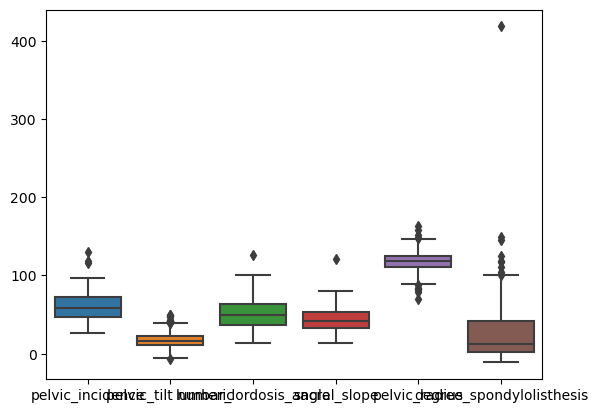

In [62]:
import seaborn as sns
sns.boxplot(data=new)

In [63]:
A=new.drop(['class'],axis=1)
A

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [64]:
for i in A:
    
    q1 = A[i].quantile(0.25)
    q3 = A[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low_limit = q1-1.5*iqr #acceptable range
    upper_limit = q3+1.5*iqr #acceptable range
    upper_limit
    low_limit
    for j in A[i]:
        if j<low_limit:
            A[i]=np.where(new[i] < low_limit,low_limit,new[i]) # low limit
        else:
            A[i]=np.where(new[i] > upper_limit,upper_limit,A[i]) # upper limit

<AxesSubplot:>

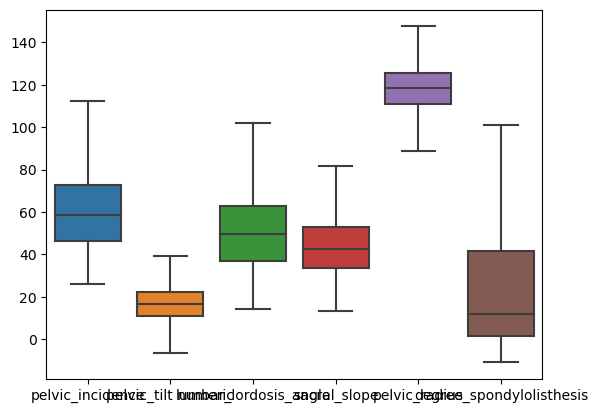

In [65]:
sns.boxplot(data=A)

In [66]:
B = new[new.select_dtypes(include=['object']).columns.tolist()]
B.head()

,class
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


In [68]:
new = pd.concat([B,A],axis=1)

In [69]:
new.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,Abnormal,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,Abnormal,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,Abnormal,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,Abnormal,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,Abnormal,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


# Churn Rate Analysis

In [70]:
new['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [71]:
(210/310)*100

67.74193548387096

# Trend Analysis

In [72]:
Class_normal= new[new["class"] == "Abnormal"]
Class_normal

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,Abnormal,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,Abnormal,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,Abnormal,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,Abnormal,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,Abnormal,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
205,Abnormal,80.111572,33.942432,85.101608,46.169139,125.593624,100.292107
206,Abnormal,95.480229,39.300383,59.000000,48.930176,96.683903,77.283072
207,Abnormal,74.094731,18.823727,76.032156,55.271004,128.405731,73.388216
208,Abnormal,87.679087,20.365613,93.822416,67.313473,120.944829,76.730629


In [73]:
from sklearn.preprocessing import LabelEncoder
B=B.apply(LabelEncoder().fit_transform)
B.tail()
# label in ascending order

,class
305,1
306,1
307,1
308,1
309,1


In [74]:
new = pd.concat([B,A],axis=1)

In [75]:
new

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,0,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,0,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,0,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
305,1,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,1,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,1,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,1,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


# Step 3: Data Partition

In [76]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = new.drop(['class'],axis=1)
y = new[['class']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [77]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

# Ploting Tree
import graphviz 
from six import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [78]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
78,0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646
64,0,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972
8,0,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
169,0,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635


In [79]:
independent_variable = list(train.columns[1:])
independent_variable

['pelvic_incidence',
 'pelvic_tilt numeric',
 'lumbar_lordosis_angle',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

In [80]:
new.rename(columns = {'class' : 'Class'}, inplace = True)
new

,Class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
1,0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,0,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,0,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,0,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...,...
305,1,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,1,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,1,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,1,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


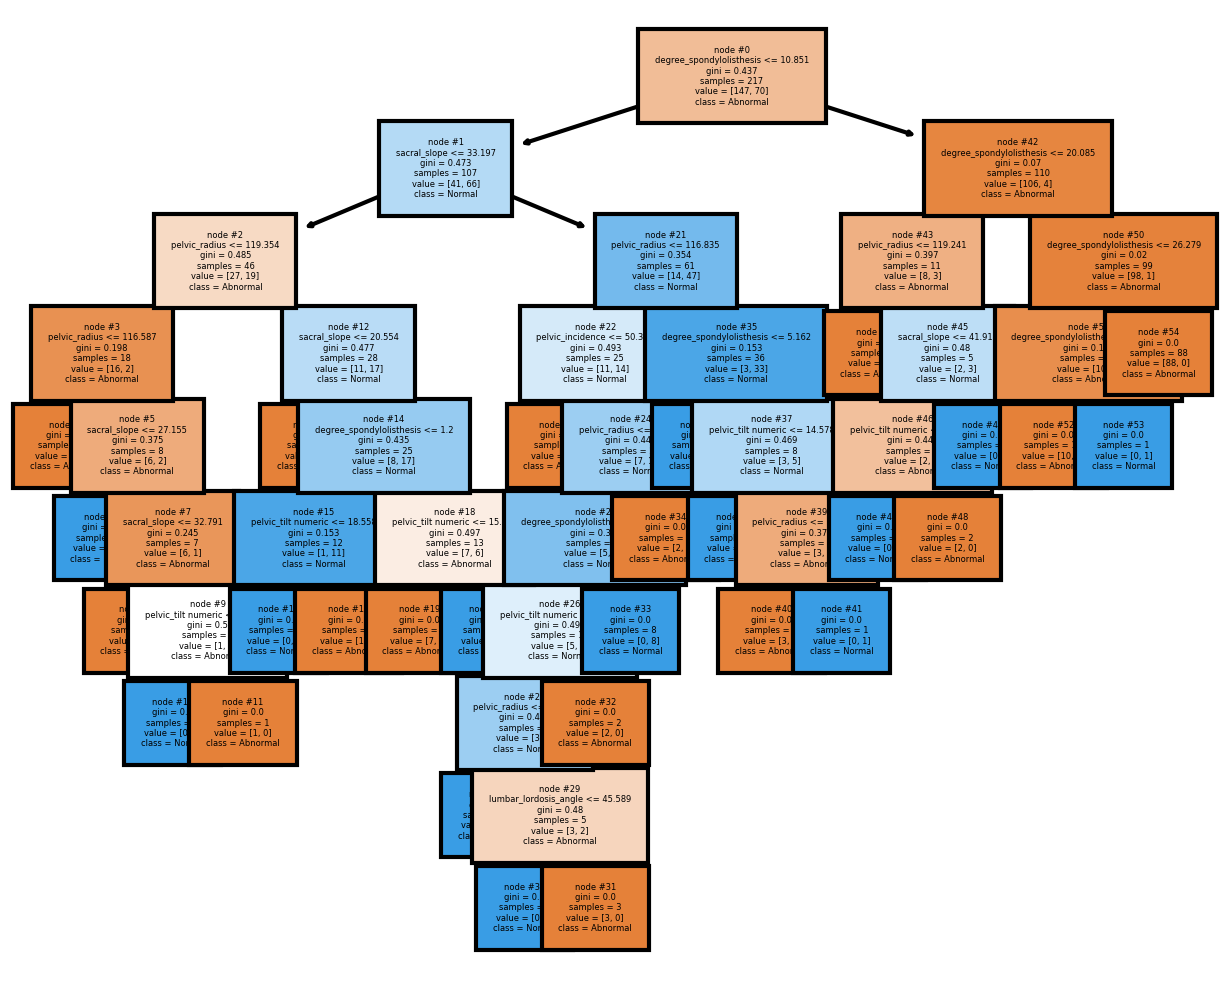

In [81]:
from sklearn import tree
import matplotlib.pyplot as plt

Class =['Abnormal', 'Normal']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Class, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

# Prediction on train dataset

In [82]:
train.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400
78,0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646
64,0,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972
8,0,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018
169,0,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635


In [83]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Predicted
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0
78,0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0
64,0,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,0
8,0,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
169,0,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,0


# Step 7 : Model Performance Metrics

In [84]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['class'])
print(matrix)

[[147   0]
 [  0  70]]


#### Final accuracy of Model Before Pruning 

In [85]:
Accuracy_Train=((147+70)/(217)*100)
print(Accuracy_Train)   # overfit or High accuracy

100.0


In [86]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00        70

    accuracy                           1.00       217
   macro avg       1.00      1.00      1.00       217
weighted avg       1.00      1.00      1.00       217



### Model Improvement by Pruning Method ( Cut Tree)

In [87]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier(criterion='gini',  #splitter
                                 min_samples_leaf=40, ## child
                                 min_samples_split=50, #parent 
                                 max_depth=3)  #branches
#Train the model using the training sets
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=40, min_samples_split=50)

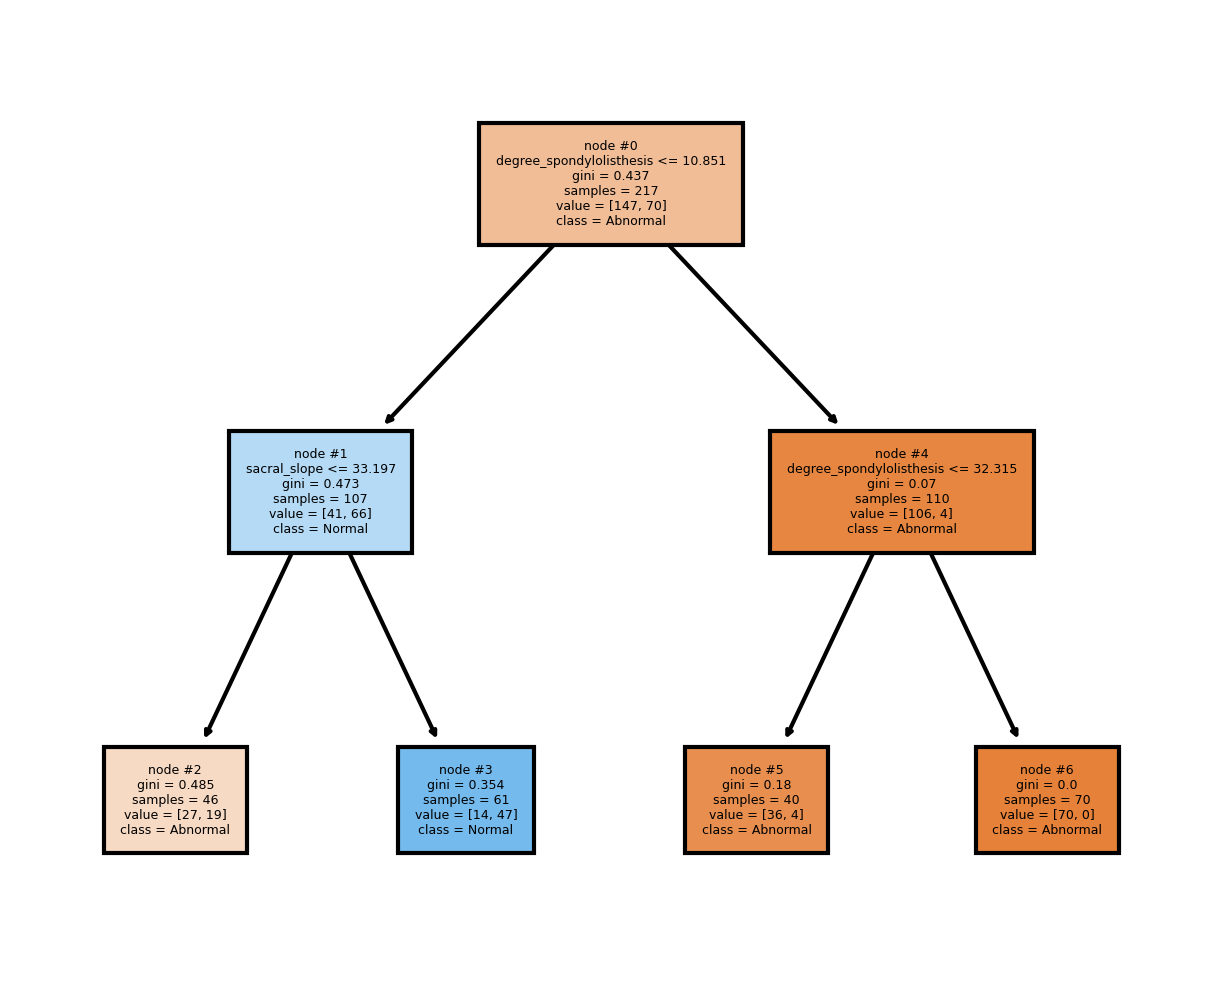

In [88]:
from sklearn import tree
import matplotlib.pyplot as plt

Class=['Abnormal', 'Normal']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Class, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=3); # 
#fig.savefig('imagename.png')

In [89]:
train['Predicted']=dt.predict(X_train)  # MODEL = dt
train.head()

,class,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,Predicted
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
78,0,67.412538,17.442797,60.144640,49.969741,111.123970,33.157646,0
64,0,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,1
8,0,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,0
169,0,44.253476,1.101087,38.000000,43.152390,98.274107,23.910635,0


#### Final accuracy of Model after Pruning 

In [90]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['class'])
print(matrix)

[[133  23]
 [ 14  47]]


In [91]:
Accuracy_Train=((133+47)/(217)*100)
print(Accuracy_Train)

82.94930875576037


In [92]:
from sklearn.metrics import classification_report
print(classification_report(train['class'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       147
           1       0.77      0.67      0.72        70

    accuracy                           0.83       217
   macro avg       0.81      0.79      0.80       217
weighted avg       0.83      0.83      0.83       217



* as the accuracy is 83% so we can apply the day for test also

# Step 8 : Predictions on Test Dataset

In [93]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
82,88.623908,29.089453,47.564262,59.534455,121.764780,51.805899,0
193,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,0
174,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,0
248,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,1
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,0


In [94]:
test['Predicted']=dt.predict(X_test)
test.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class,Predicted
82,88.623908,29.089453,47.564262,59.534455,121.764780,51.805899,0,0
193,70.250436,10.340123,76.370070,59.910314,119.237007,32.666502,0,0
174,61.411737,25.384364,39.096869,36.027373,103.404597,21.843407,0,0
248,47.319648,8.573680,35.560252,38.745967,120.576972,1.630664,1,1
49,41.767732,17.899402,20.030886,23.868330,118.363389,2.062963,0,0


# Step 9 : Model Performance Metrics on Test data 

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['class'])
print(confusion_matrix)

[[56 12]
 [ 7 18]]


In [96]:
Accuracy_test=((56+18)/(93)*100)
Accuracy_test

79.56989247311827

# Sensitivity & Specificity

#### Test

In [98]:
from sklearn.metrics import classification_report
print(classification_report(test['class'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        63
           1       0.72      0.60      0.65        30

    accuracy                           0.80        93
   macro avg       0.77      0.74      0.75        93
weighted avg       0.79      0.80      0.79        93



* 60% is accuracy of bad customer capture by model 
* 89% is accuracy of Good customer capture by model 

# Grid Search Method 

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
params = { 'min_samples_split': [40, 45,70], ## Parent 
           'min_samples_leaf': [50,23,60], ## Child or Leave 
           'max_depth':[3,4,6]}  # Branches
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params, 
                              verbose=1, 
                              cv=10)
grid_search_cv.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 6],
                         'min_samples_leaf': [50, 23, 60],
                         'min_samples_split': [40, 45, 70]},
             verbose=1)

In [100]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=23, min_samples_split=40,
                       random_state=42)

# Finish